In [1]:
import nltk
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
#import wordcloud
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
from subprocess import check_output

In [2]:
data=pd.read_csv('/Users/vijayalk/TSLA_tweets_56.csv', encoding = "ISO-8859-1")
#print(data)


In [3]:
#how many for and against Tesla tweets we have?
print(sum(data['Sentiment']=="ForTesla"))
print(sum(data['Sentiment']=="AgainstTesla"))

28
28


In [4]:
#split training and test with stratifying on sentiment
train,test=train_test_split(data,test_size=0.25,random_state=0,stratify=data['Sentiment'])

In [5]:
train_for=train[train['Sentiment']=='ForTesla']
#print(train_for)
train_opp=train[train['Sentiment']=='AgainstTesla']
train_for=train_for['Tweet']
train_opp=train_opp['Tweet']

In [6]:
print(train_for)

32    Just got my VIN today also! So excited! Waited...
11    Great job representing $TSLA shareholders on t...
3     "If Nikola Tesla had not been censured we coul...
40             This is the funnest car IÕve ever driven
39    First, itÕs important to know that Tesla is th...
45    Unlike gas cars, which start dirty and get eve...
36    Reason RBC question about Model 3 demand is ab...
42    We currently have over 1,000 Tesla batteries o...
41    I really love my Tesla. I'm in the future. Tha...
34    I could go on and on about what makes #Tesla s...
55    elonmusk - I have been driving model S for abo...
49    Schools across Hawaii are using Powerwalls and...
52    WhatÕs not to like. Most was expected if youÕv...
51    I would really hope this earning would boost t...
46    ÒIn a storm that left trees down, multiple fee...
38    The 2 questioners I ignored on the Q1 call are...
4     I love the elonmusk hate after yesterdayês ear...
37    The reason the Bernstein question about Ca

In [7]:
def wordcloud_draw(data,color='black'):
    words=' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

For Tesla words


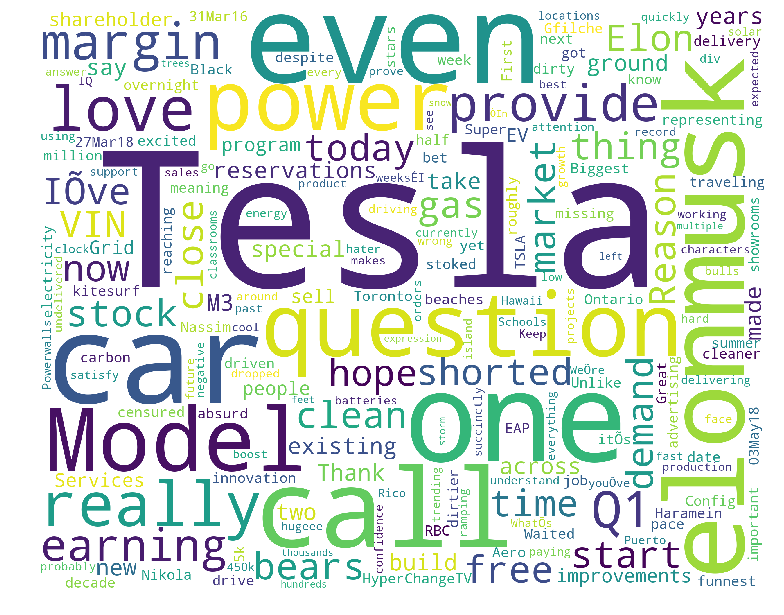

Against Tesla words


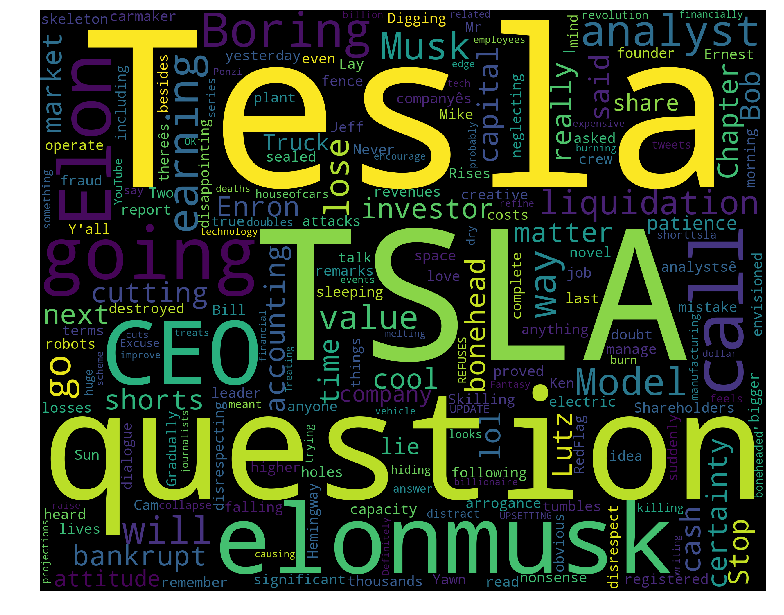

In [8]:
print("For Tesla words")
wordcloud_draw(train_for,'white')
print("Against Tesla words")
wordcloud_draw(train_opp)

In [19]:
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.Tweet.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_cleaned,row.Sentiment))

test_for = test[ test['Sentiment'] == 'ForTesla']
test_for = test_for['Tweet']
test_opp = test[ test['Sentiment'] == 'AgainstTesla']
test_opp = test_opp['Tweet']

In [20]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, Sentiment) in tweets:
        all.extend(words)
    #print(all)
    return all



In [21]:
def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    #print(wordlist)
    #print(wordlist.keys)
    return features


In [22]:
w_features = get_word_features(get_words_in_tweets(tweets))



In [23]:
print(w_features)

dict_keys(['just', 'got', 'vin', 'today', 'also!', 'excited!', 'waited', 'overnight', 'toronto', '31mar16.', 'config', '27mar18.', '03may18.', 'delivery', 'date', 'yet.', 'black,', 'aero,', 'eap.', 'super', 'stoked', 'drive', 'our', 'ontario', 'beaches', 'and', 'kitesurf', 'this', 'summer.', 'electricity', '90%', 'carbon', 'free.', 'thanks', 'elon,', 'tesla!', 'great', 'job', 'representing', '$tsla', 'shareholders', 'the', 'call', 'gfilche', 'hyperchangetv.', 'biggest', 'thing', 'bears', 'are', 'missing', 'pace', 'innovation.', 'one', 'close', 'now,', 'with', 'any', 'hope', 'being', 'next', 'decade.', 'elonmusk', 'tesla', '"if', 'nikola', 'had', 'not', 'been', 'censured', 'could', 'have', 'traveling', 'between', 'stars', 'now."', 'nassim', 'haramein', 'funnest', 'car', 'iõve', 'ever', 'driven', 'first,', 'itõs', 'important', 'know', 'that', 'most', 'shorted', '(meaning', 'bet', 'against)', 'stock', 'market', 'has', 'for', 'while', 'unlike', 'gas', 'cars,', 'which', 'start', 'dirty', 'g

In [24]:
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['containts(%s)' % word] = (word in document_words)
    return features

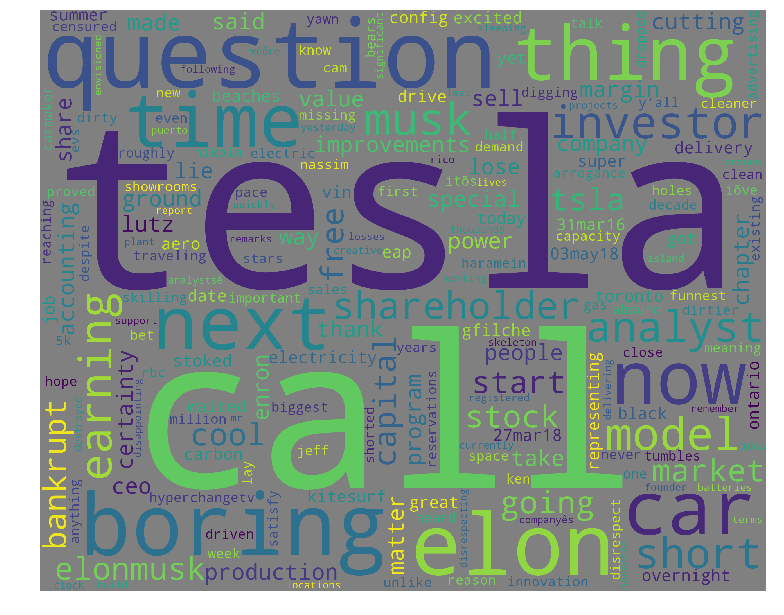

In [25]:
wordcloud_draw(w_features,color='gray')

In [26]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [27]:
neg_cnt = 0
pos_cnt = 0
for obj in test_opp: 
    res =  classifier.classify(extract_features(obj.split()))
    print('AgainstTesla',res)
    if(res == 'AgainstTesla'): 
        neg_cnt = neg_cnt + 1
for obj in test_for: 
    res =  classifier.classify(extract_features(obj.split()))
    print('ForTesla',res)
    if(res == 'ForTesla'): 
        pos_cnt = pos_cnt + 1
        
print('[AgainstTesla]: %s Total Tweets; %s Correctly Classified Tweets '  % (len(test_opp),neg_cnt))        
print('[ForTesla]: %s Total Tweets; %s Correctly Classifier Tweets '  % (len(test_for),pos_cnt))    

AgainstTesla ForTesla
AgainstTesla AgainstTesla
AgainstTesla ForTesla
AgainstTesla ForTesla
AgainstTesla AgainstTesla
AgainstTesla AgainstTesla
AgainstTesla AgainstTesla
ForTesla ForTesla
ForTesla ForTesla
ForTesla ForTesla
ForTesla ForTesla
ForTesla ForTesla
ForTesla AgainstTesla
ForTesla ForTesla
[AgainstTesla]: 7 Total Tweets; 4 Correctly Classified Tweets 
[ForTesla]: 7 Total Tweets; 6 Correctly Classifier Tweets 


In [28]:
print(training_set)

[({'containts(just)': True, 'containts(got)': True, 'containts(vin)': True, 'containts(today)': True, 'containts(also!)': True, 'containts(excited!)': True, 'containts(waited)': True, 'containts(overnight)': True, 'containts(toronto)': True, 'containts(31mar16.)': True, 'containts(config)': True, 'containts(27mar18.)': True, 'containts(03may18.)': True, 'containts(delivery)': True, 'containts(date)': True, 'containts(yet.)': True, 'containts(black,)': True, 'containts(aero,)': True, 'containts(eap.)': True, 'containts(super)': True, 'containts(stoked)': True, 'containts(drive)': True, 'containts(our)': True, 'containts(ontario)': True, 'containts(beaches)': True, 'containts(and)': True, 'containts(kitesurf)': True, 'containts(this)': True, 'containts(summer.)': True, 'containts(electricity)': True, 'containts(90%)': True, 'containts(carbon)': True, 'containts(free.)': True, 'containts(thanks)': True, 'containts(elon,)': True, 'containts(tesla!)': True, 'containts(great)': False, 'conta

In [102]:
#traintext=extract_features

In [103]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import LogisticRegression
#param_grid={'C':[0.001,0.01,0.1,1,10]}
#grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
#grid.fit(train['Tweet'],train['Sentiment'])

In [29]:
#decision tree classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
dtclassifier = nltk.DecisionTreeClassifier.train(training_set)
neg_cnt = 0
pos_cnt = 0
for obj in test_opp: 
    res =  dtclassifier.classify(extract_features(obj.split()))
    print('AgainstTesla',res)
    if(res == 'AgainstTesla'): 
        neg_cnt = neg_cnt + 1
for obj in test_for: 
    res =  dtclassifier.classify(extract_features(obj.split()))
    print('ForTesla',res)
    if(res == 'ForTesla'): 
        pos_cnt = pos_cnt + 1
        
print('[AgainstTesla]: %s Total Tweets; %s Correctly Classified Tweets '  % (len(test_opp),neg_cnt))        
print('[ForTesla]: %s Total Tweets; %s Correctly Classified Tweets '  % (len(test_for),pos_cnt))  

AgainstTesla ForTesla
AgainstTesla ForTesla
AgainstTesla ForTesla
AgainstTesla ForTesla
AgainstTesla ForTesla
AgainstTesla ForTesla
AgainstTesla ForTesla
ForTesla ForTesla
ForTesla ForTesla
ForTesla ForTesla
ForTesla ForTesla
ForTesla ForTesla
ForTesla ForTesla
ForTesla ForTesla
[AgainstTesla]: 7 Total Tweets; 0 Correctly Classified Tweets 
[ForTesla]: 7 Total Tweets; 7 Correctly Classified Tweets 


In [52]:
#Maxent classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
mclassifier = nltk.MaxentClassifier.train(training_set, max_iter=3)
neg_cnt = 0
pos_cnt = 0
for obj in test_opp: 
    res =  mclassifier.classify(extract_features(obj.split()))
    print('AgainstTesla',res)
    if(res == 'AgainstTesla'): 
        neg_cnt = neg_cnt + 1
for obj in test_for: 
    res =  mclassifier.classify(extract_features(obj.split()))
    print('ForTesla',res)
    if(res == 'ForTesla'): 
        pos_cnt = pos_cnt + 1
        
print('[AgainstTesla]: %s Total Tweets; %s Correctly Classified Tweets '  % (len(test_opp),neg_cnt))        
print('[ForTesla]: %s Total Tweets; %s Correctly Classified Tweets '  % (len(test_for),pos_cnt))  

  ==> Training (3 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.500
             2          -0.02553        1.000
         Final          -0.00433        1.000
AgainstTesla ForTesla
AgainstTesla AgainstTesla
AgainstTesla ForTesla
AgainstTesla AgainstTesla
AgainstTesla AgainstTesla
AgainstTesla AgainstTesla
AgainstTesla AgainstTesla
ForTesla ForTesla
ForTesla ForTesla
ForTesla AgainstTesla
ForTesla ForTesla
ForTesla ForTesla
ForTesla AgainstTesla
ForTesla ForTesla
[AgainstTesla]: 7 Total Tweets; 5 Correctly Classified Tweets 
[ForTesla]: 7 Total Tweets; 5 Correctly Classified Tweets 


In [53]:
newtweet=pd.read_csv('/Users/vijayalk/New_tweet.csv', encoding = "ISO-8859-1")

In [54]:
pred=mclassifier.classify(extract_features(newtweet))

In [55]:
print(newtweet)
print(pred)

                                               Tweet  Sentiment
0  A week into Model 3 ownership and I have to ag...        NaN
ForTesla
